In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

In [2]:
# Define data directory
data_dir = "data"  # Adjust this path to your actual dataset location

In [3]:
# Image data generators for training and validation
train_datagen = ImageDataGenerator(validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(80, 80),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)
print(f"Train batch size: {train_generator.batch_size}")

Found 67919 images belonging to 2 classes.
Train batch size: 32


In [4]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(80, 80),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
print(f"Validation batch size: {validation_generator.batch_size}")

Found 16979 images belonging to 2 classes.
Validation batch size: 32


In [5]:
# Define the improved CNN model
cnn_model = Sequential([
    # First Convolutional Block
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(80, 80, 3)),  # Correct input shape
    BatchNormalization(),  # Normalize activations to improve training speed and stability
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Block
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Convolutional Block
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening the output from the convolutional layers
    Flatten(),

    # Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting

    # Output Layer for Classification
    Dense(2, activation='softmax')  # Output layer for two classes (open eyes and closed eyes)
])

# Compile the model with an appropriate optimizer and loss function
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

# Display the model summary
cnn_model.summary()

# Print details of generator compatibility
print(f"Model output shape: {cnn_model.output_shape}")
print(f"Number of classes: {train_generator.num_classes}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 78, 78, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 37, 37, 64)       256       
 hNormalization)                                                 
                                                        

In [7]:
# Train the model
history = cnn_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=200,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)

Epoch 1/200
2123/2123 [==============================] - 41s 19ms/step - loss: 0.0352 - categorical_accuracy: 0.9880 - precision: 0.9880 - recall: 0.9880 - val_loss: 0.1779 - val_categorical_accuracy: 0.9396 - val_precision: 0.9396 - val_recall: 0.9396
Epoch 2/200
2123/2123 [==============================] - 41s 19ms/step - loss: 0.0345 - categorical_accuracy: 0.9886 - precision: 0.9886 - recall: 0.9886 - val_loss: 0.1016 - val_categorical_accuracy: 0.9680 - val_precision: 0.9680 - val_recall: 0.9680
Epoch 3/200
2123/2123 [==============================] - 41s 20ms/step - loss: 0.0304 - categorical_accuracy: 0.9895 - precision: 0.9895 - recall: 0.9895 - val_loss: 0.1045 - val_categorical_accuracy: 0.9716 - val_precision: 0.9716 - val_recall: 0.9716
Epoch 4/200
2123/2123 [==============================] - 40s 19ms/step - loss: 0.0310 - categorical_accuracy: 0.9896 - precision: 0.9896 - recall: 0.9896 - val_loss: 0.1599 - val_categorical_accuracy: 0.9569 - val_precision: 0.9569 - val_rec

In [8]:
# Save the model
cnn_model.save("weights/cnn_driver_drowsiness_detection-m1.h5")

In [10]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'precision', 'recall', 'val_loss', 'val_categorical_accuracy', 'val_precision', 'val_recall'])


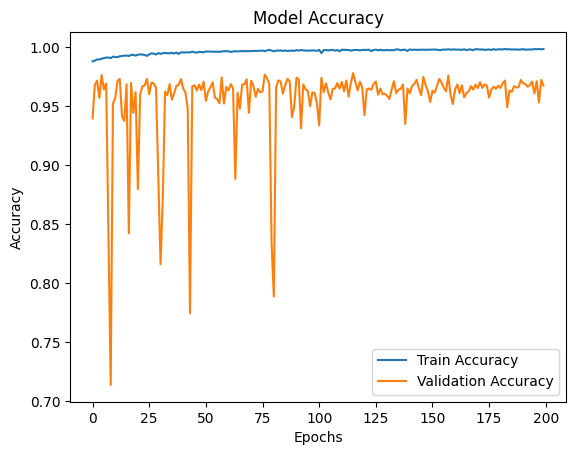

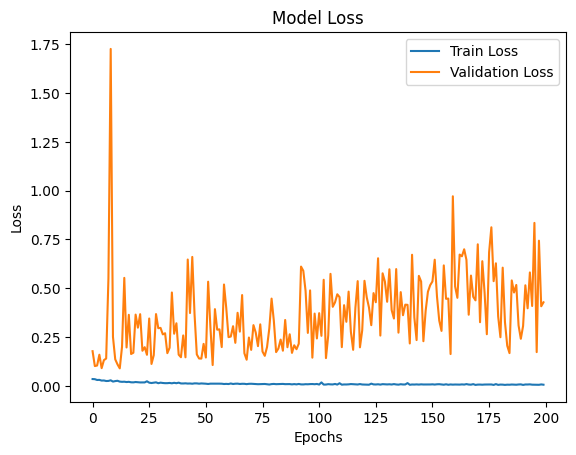

In [11]:
# Plot Accuracy Graph
plt.figure()
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Plot Loss Graph
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()
